# Data Investigation - Status

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import datetime
import math

import seaborn as sns
sns.set()

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Import Data

In [3]:
print('Loading Status Data...')

try:
    file_path_slug = '../../../datasets/bayareabikeshare/*_status_data.csv'

    # glob all files
    file_list = glob(file_path_slug)

    status_import = pd.DataFrame()

    counter = 1

    # load data from each file
    for file in file_list:

        chunks = []
        chunk_counter = 1
        chunksize = 10000
        num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)

        # import file in chunks
        for chunk in pd.read_csv(file, chunksize=chunksize, iterator=True):

            # append chunk to chunks list
            chunks.append(chunk)

            if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
                print('\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
            chunk_counter += 1

        if counter == 1:
            status_01 = pd.DataFrame()
            status_01 = pd.concat(chunks)
        elif counter == 2:
            status_02 = pd.DataFrame()
            status_02 = pd.concat(chunks)
        elif counter == 3:
            status_03 = pd.DataFrame()
            status_03 = pd.concat(chunks)
        elif counter == 4:
            status_04 = pd.DataFrame()
            status_04 = pd.concat(chunks)
        else:
            pass


        print('Finished file! (%d of %d)' % (counter, len(file_list)))
        counter += 1

    print('Data Loaded Successfully!')

except:
    print('oops... something went wrong importing the data :(')
    

Loading Status Data...
	[00:36:23.668794] finished chunk 1 of 1835
	[00:36:25.915982] finished chunk 184 of 1835
	[00:36:28.236522] finished chunk 368 of 1835
	[00:36:30.622715] finished chunk 552 of 1835
	[00:36:32.943963] finished chunk 736 of 1835
	[00:36:35.392119] finished chunk 920 of 1835
	[00:36:37.742428] finished chunk 1104 of 1835
	[00:36:40.194993] finished chunk 1288 of 1835
	[00:36:43.154227] finished chunk 1472 of 1835
	[00:36:46.140037] finished chunk 1656 of 1835
	[00:36:48.508996] finished chunk 1835 of 1835
Finished file! (1 of 4)
	[00:37:01.834186] finished chunk 1 of 3665
	[00:37:07.199539] finished chunk 367 of 3665
	[00:37:12.333700] finished chunk 734 of 3665
	[00:37:17.335896] finished chunk 1101 of 3665
	[00:37:24.188588] finished chunk 1468 of 3665
	[00:37:30.990694] finished chunk 1835 of 3665
	[00:37:37.899543] finished chunk 2202 of 3665
	[00:37:43.527378] finished chunk 2569 of 3665
	[00:37:50.298186] finished chunk 2936 of 3665
	[00:37:56.667506] finishe

## Clean Data

> Correct timestamp data to truncate seconds, they are all 1 or 2 seconds for precision while teh dataset is a minute by minute record

In [5]:
print('[%s] Started status_01[\'time\'] Cleaning' % datetime.datetime.now().time())
status_01['time']   = pd.to_datetime(status_01['time'],   format="%Y/%m/%d %H:%M:%S").values.astype('<M8[m]')
status_01.drop_duplicates(inplace=True)
print('\t[%s] Complete!\n' % datetime.datetime.now().time())

print('[%s] Started status_02[\'time\'] Cleaning' % datetime.datetime.now().time())
status_02['time']   = pd.to_datetime(status_02['time'],   format="%Y/%m/%d %H:%M:%S").values.astype('<M8[m]')
status_02.drop_duplicates(inplace=True)
print('\t[%s] Complete!\n' % datetime.datetime.now().time())

print('[%s] Started status_03[\'time\'] Cleaning' % datetime.datetime.now().time())
status_03['time']   = pd.to_datetime(status_03['time'],   format="%m/%d/%Y %H:%M:%S").values.astype('<M8[m]')
status_03.drop_duplicates(inplace=True)
print('\t[%s] Complete!\n' % datetime.datetime.now().time())

print('[%s] Started status_04[\'time\'] Cleaning' % datetime.datetime.now().time())
status_04['time']   = pd.to_datetime(status_04['time'],   format="%Y/%m/%d %H:%M:%S").values.astype('<M8[m]')
status_04.drop_duplicates(inplace=True)
print('\t[%s] Complete!\n' % datetime.datetime.now().time())

# Concat all frames
print('[%s] Starting concat' % datetime.datetime.now().time())
status_data_import = pd.DataFrame()
status_data_import = pd.concat([status_01, status_02, status_03, status_04])
print('\t[%s]Complete!\n' % datetime.datetime.now().time())
status_data_import.head(3)

[00:45:23.831979] Started status_01['time'] Cleaning
	[00:45:43.675489] Complete!

[00:45:43.679169] Started status_02['time'] Cleaning
	[00:46:25.187530] Complete!

[00:46:25.190291] Started status_03['time'] Cleaning
	[00:51:09.056079] Complete!

[00:51:09.058079] Started status_04['time'] Cleaning
	[00:51:38.284411] Complete!

[00:51:38.286693] Starting concat
	[00:52:00.346066]Complete!



,station_id,bikes_available,docks_available,time
0,2,12,15,2014-03-01 00:00:00
1,2,12,15,2014-03-01 00:01:00
2,2,12,15,2014-03-01 00:02:00


In [19]:
status_data_import.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107233299 entries, 0 to 16994601
Data columns (total 4 columns):
station_id         int64
bikes_available    int64
docks_available    int64
time               datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.0 GB


In [6]:
status_data = status_data_import.copy()
status_data.drop_duplicates(inplace=True)
status_data.reset_index(inplace=True, drop=True)
status_data.head(3)

,station_id,bikes_available,docks_available,time
0,2,12,15,2014-03-01 00:00:00
1,2,12,15,2014-03-01 00:01:00
2,2,12,15,2014-03-01 00:02:00


# Utility Functions

In [59]:
def show_station(df, id, time_min, time_max, color='b', col='bikes_available'):
    t = df[df.station_id == id]
    t.set_index('time', inplace=True)
    ax = t[col].plot(color=color, figsize=(24,3))
    ax.set_xlim(time_min, time_max)
    title = 'Station %s' % id
    ax.set_title(title)
    plt.show()

def date_fixes(old_station, new_station, change_date):
    
    print('[%s]\tUpdating %s to %s for dates after %s' % (datetime.datetime.now().time(), old_station, new_station, change_date))

    print('[%s]\tStarted indexing...' % datetime.datetime.now().time())
    index_to_update = status_data[(status_data.station_id == old_station) & (status_data.time >= change_date)].index
    print('\t[%s]\tComplete!' % datetime.datetime.now().time())    

    station_check = [old_station, new_station]

    t_min = pd.Timestamp('2013-07-01')
    t_max = pd.Timestamp('2016-10-01')

    print('[%s]\tStarted Update...' % datetime.datetime.now().time())
    status_data.loc[index_to_update, 'station_id'] = new_station
    print('\t[%s]\tComplete!' % datetime.datetime.now().time())

    for station in station_check:
        show_station(status_data, station, t_min, t_max)

def dock_count_fix(df, station_id, change_date, dock_num):
    print('[%s]\tUpdating Total Station %s Dock Count to %s for dates after %s' % (datetime.datetime.now().time(), 
                                                                                           station_id, 
                                                                                           dock_num, 
                                                                                           change_date))
    
    print('[%s]\tGetting Update Index...' % datetime.datetime.now().time())
    index_to_update = df[(df.station_id == station_id) & (df.time >= change_date)].index
    print('\t[%s]\tComplete!' % datetime.datetime.now().time())
    
    print('[%s]\tStarted Update...' % datetime.datetime.now().time())
    df.loc[index_to_update, 'dock_count'] = dock_num
    print('\t[%s]\tComplete!' % datetime.datetime.now().time())    

## Correct Relocated Stations

> There was a delay in station_id updates when stations 23, 24, 25, and 26 were relocated, update status information by changing the station_id for these stations in dates after they were relocated

## Preview Relocated Stations pre cleaning

In [9]:
closed_stations = [21, 22, 23, 24, 25, 26]

t_min = pd.Timestamp('2013-07-01')
t_max = pd.Timestamp('2016-10-01')

for station in closed_stations:
    show_station(status_data, station, t_min, t_max)

In [10]:
relocated_stations = [88, 89, 90, 91]

t_min = pd.Timestamp('2013-07-01')
t_max = pd.Timestamp('2016-10-01')

for station in relocated_stations:
    show_station(status_data, station, t_min, t_max)

In [13]:
change_date = datetime.datetime.strptime('2016-07-05', '%Y-%m-%d')
date_fixes(23, 88, change_date)
date_fixes(24, 89, change_date)

change_date = datetime.datetime.strptime('2016-08-04', '%Y-%m-%d')
date_fixes(25, 91, change_date)
date_fixes(26, 90, change_date)


[00:57:12.854290]	Updating 23 to 88 for dates after 2016-07-05 00:00:00
[00:57:12.854604]	Started indexing...
	[00:57:19.832851]	Complete!
[00:57:19.833213]	Started Update...
	[00:57:25.915596]	Complete!
[00:57:25.918673]	Updating 24 to 89 for dates after 2016-07-05 00:00:00
[00:57:25.918798]	Started indexing...
	[00:57:27.111541]	Complete!
[00:57:27.112734]	Started Update...
	[00:57:33.356686]	Complete!
[00:57:33.358299]	Updating 25 to 91 for dates after 2016-08-04 00:00:00
[00:57:33.358669]	Started indexing...
	[00:57:35.350921]	Complete!
[00:57:35.351250]	Started Update...
	[00:57:40.206308]	Complete!
[00:57:40.206939]	Updating 26 to 90 for dates after 2016-08-04 00:00:00
[00:57:40.207138]	Started indexing...
	[00:57:41.377441]	Complete!
[00:57:41.377732]	Started Update...
	[00:57:44.364696]	Complete!


## Drop station 87, there is no station 87

In [14]:
# drop station 87 - there is no station 87
print('[%s] - Removing Station 87 status, there is no station 87' % (datetime.datetime.now().time()))
print('\t\tremoving %s items' % len(status_data[status_data.station_id == 87].index))
status_data.drop(status_data[status_data.station_id == 87].index, inplace=True)
print('[%s] - Complete' % (datetime.datetime.now().time()))

[00:58:15.709356] - Removing Station 87 status, there is no station 87
		removing 161 items
[00:59:24.849395] - Complete


In [15]:
status_data.reset_index(inplace=True, drop=True)
status_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107233138 entries, 0 to 107233137
Data columns (total 4 columns):
station_id         int64
bikes_available    int64
docks_available    int64
time               datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.2 GB


In [18]:
status_data.head(3)

,station_id,bikes_available,docks_available,time
0,2,12,15,2014-03-01 00:00:00
1,2,12,15,2014-03-01 00:01:00
2,2,12,15,2014-03-01 00:02:00


## Graphical EDA of Station Bike Availability

In [ ]:
t_min = pd.Timestamp('2013-07-01')
t_max = pd.Timestamp('2016-10-01')

for station in sorted(pd.unique(status_data.station_id)):
    show_station(status_data, station, t_min, t_max)    

## Station Status Summary

In [21]:
for i in pd.unique(status_data.station_id):
    tmp = status_data[status_data.station_id == i]
    print('Station ', i)
    for item in tmp.columns[1:-1]:
        print('%s - %s' % (item, sorted(pd.unique(tmp[item]))))
    
    print('------------------------------')

Station  2
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
------------------------------
Station  3
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
------------------------------
Station  4
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
------------------------------
Station  5
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
------------------------------
Station  6
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,

Station  51
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
------------------------------
Station  54
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
------------------------------
Station  55
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
------------------------------
Station  56
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
------------------------------
Station  57
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
docks_available - [0, 1, 2, 3, 

## Downsample Cleaned Data to 5 Minute Intervals - Mean

In [22]:
print('[%s] Resampling on interval' % datetime.datetime.now().time())
status_data_5m = status_data.copy()
status_data_5m.set_index(['station_id', 'time'], inplace=True)

# resample on 5 minute interval mean
status_data_5m = status_data_5m.groupby([pd.Grouper(level=0), pd.Grouper(freq='5T', level=-1)]).mean()
status_data_5m.reset_index(inplace=True)

print('[%s] Complete' % datetime.datetime.now().time())

[01:05:36.319057] Resampling on interval
[01:10:24.651745] Complete


## Downsample Cleaned Data to Hour Intervals - Mean

In [23]:
print('[%s] Resampling on interval' % datetime.datetime.now().time())
status_data_1h = status_data.copy()
status_data_1h.set_index(['station_id', 'time'], inplace=True)

# resample on 1 hour interval mean
status_data_1h = status_data_1h.groupby([pd.Grouper(level=0), pd.Grouper(freq='H', level=-1)]).mean()
status_data_1h.reset_index(inplace=True)

print('[%s] Complete' % datetime.datetime.now().time())

[01:10:24.783329] Resampling on interval
[01:14:31.359916] Complete


## Downsample Cleaned Data to Day Intervals - Mean

In [24]:
print('[%s] Resampling on interval' % datetime.datetime.now().time())
status_data_1d = status_data.copy()
status_data_1d.set_index(['station_id', 'time'], inplace=True)

# resample on 1 day interval mean
status_data_1d = status_data_1d.groupby([pd.Grouper(level=0), pd.Grouper(freq='D', level=-1)]).mean()
status_data_1d.reset_index(inplace=True)

print('[%s] Complete' % datetime.datetime.now().time())

[01:14:31.520431] Resampling on interval
[01:18:23.322346] Complete


## Downsample Review

In [25]:
print('Original Data Set\t', len(status_data[status_data.station_id ==2]))
print('Resampled on 5m mean\t', len(status_data_5m[status_data_5m.station_id ==2]))
print('Resampled on 1h mean\t', len(status_data_1h[status_data_1h.station_id ==2]))
print('Resampled on 1d mean\t', len(status_data_1d[status_data_1d.station_id ==2]))

Original Data Set	 1555362
Resampled on 5m mean	 315548
Resampled on 1h mean	 26310
Resampled on 1d mean	 1099


In [26]:
status_data.sort_values(['station_id', 'time'], inplace=True)
status_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107233138 entries, 90238536 to 90238535
Data columns (total 4 columns):
station_id         int64
bikes_available    int64
docks_available    int64
time               datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.0 GB


In [27]:
status_data_5m.sort_values(['station_id', 'time'], inplace=True)
status_data_5m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21747135 entries, 0 to 21747134
Data columns (total 4 columns):
station_id         int64
time               datetime64[ns]
bikes_available    float64
docks_available    float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 829.6 MB


In [28]:
status_data_1h.sort_values(['station_id', 'time'], inplace=True)
status_data_1h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1813206 entries, 0 to 1813205
Data columns (total 4 columns):
station_id         int64
time               datetime64[ns]
bikes_available    float64
docks_available    float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 69.2 MB


In [29]:
status_data_1d.sort_values(['station_id', 'time'], inplace=True)
status_data_1d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75749 entries, 0 to 75748
Data columns (total 4 columns):
station_id         75749 non-null int64
time               75749 non-null datetime64[ns]
bikes_available    75749 non-null float64
docks_available    75749 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.9 MB


## Graphical EDA of Downsamples on Select Stations

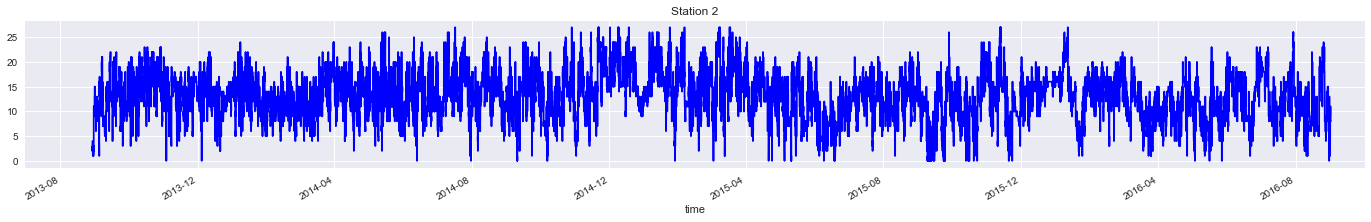

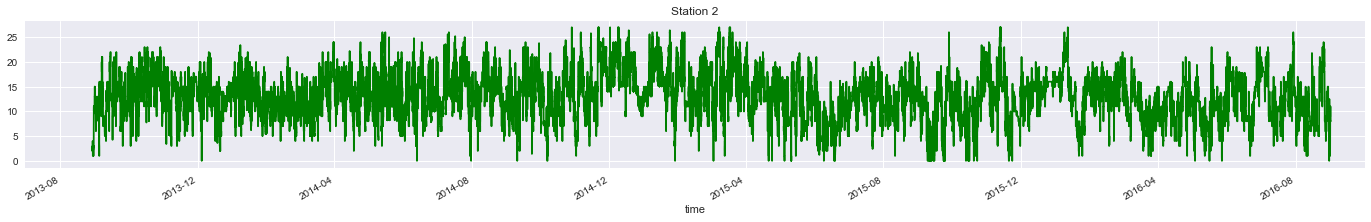

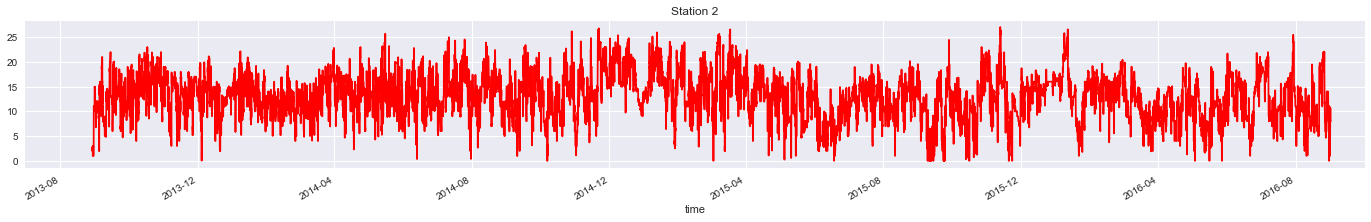

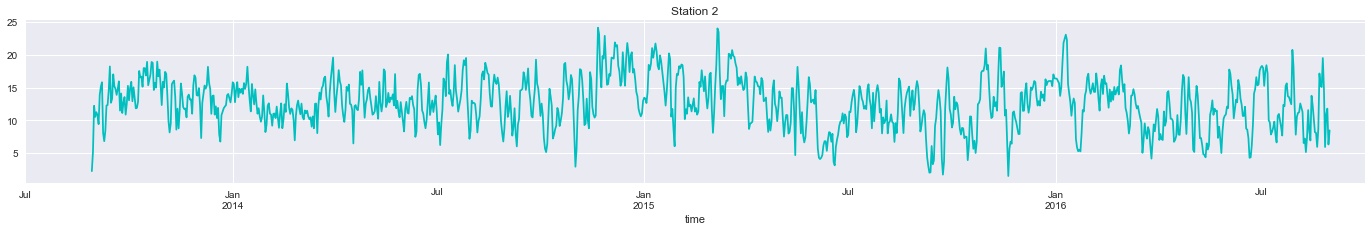

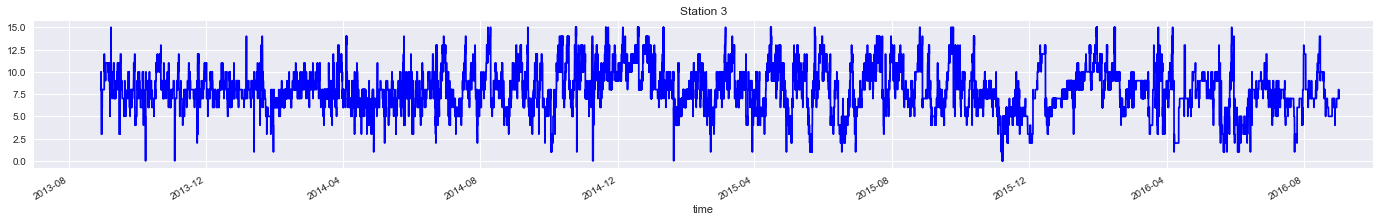

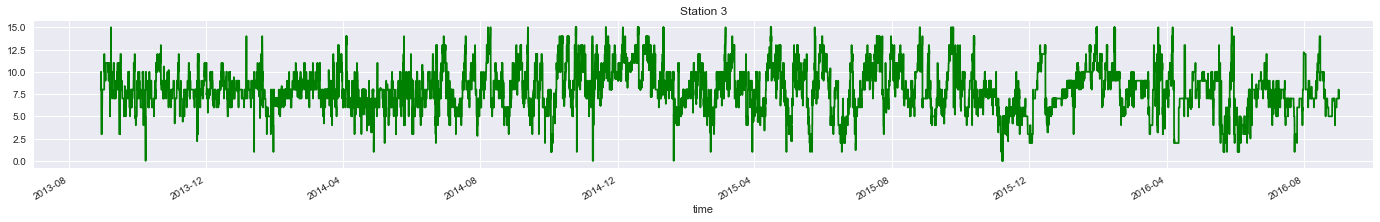

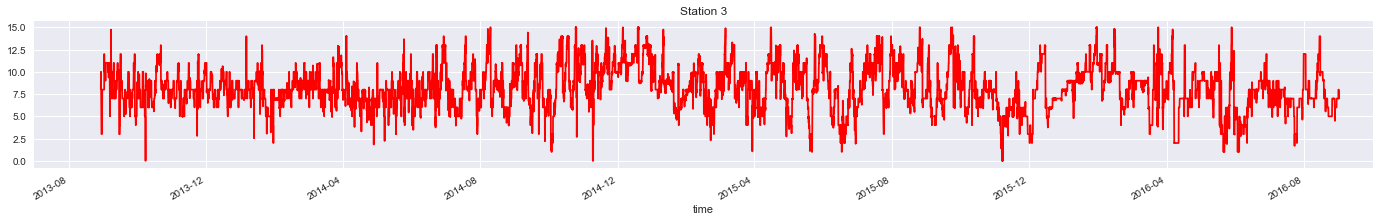

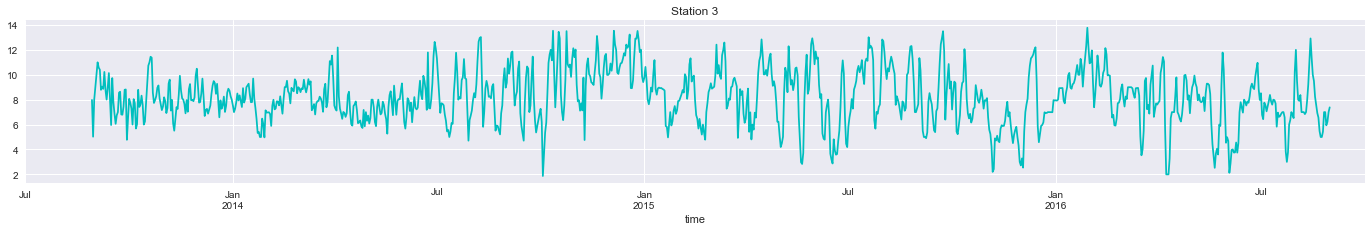

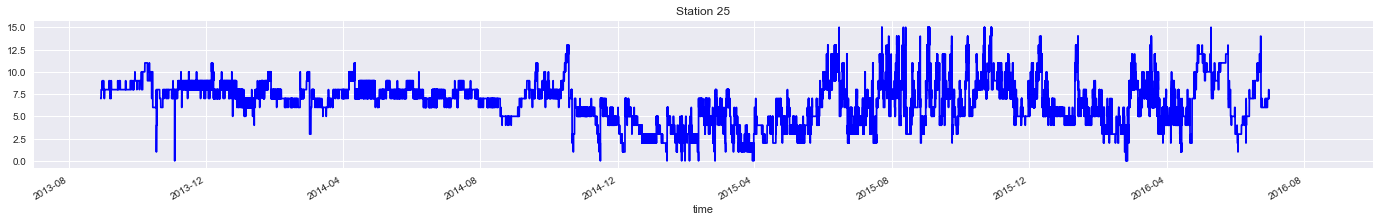

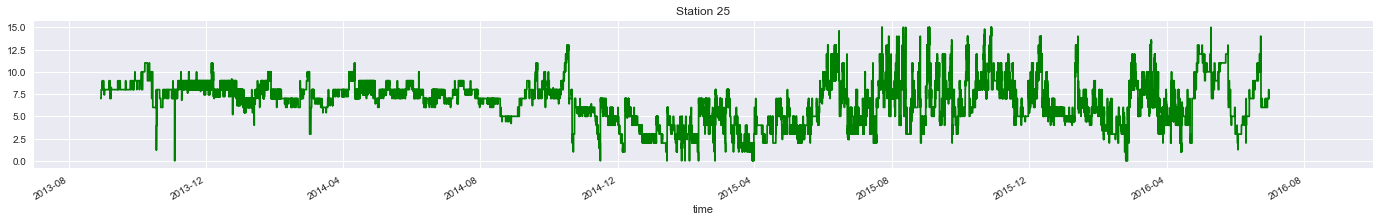

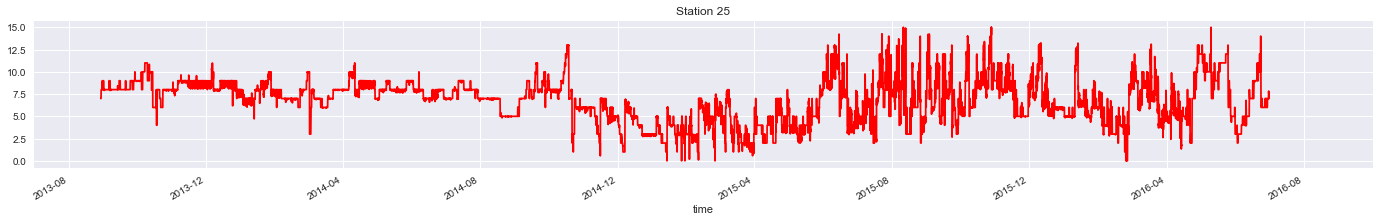

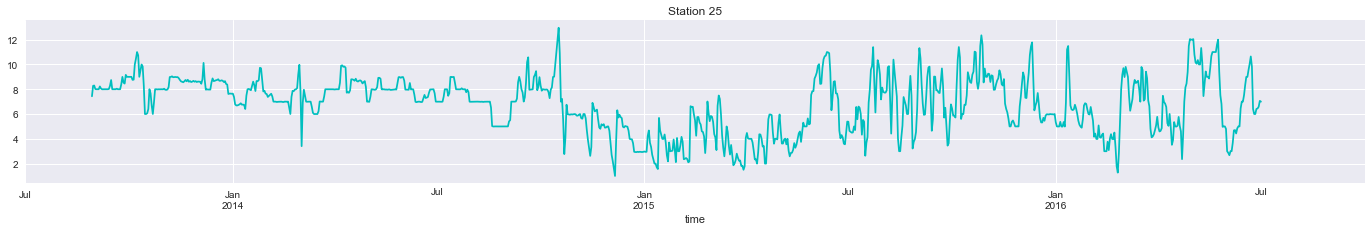

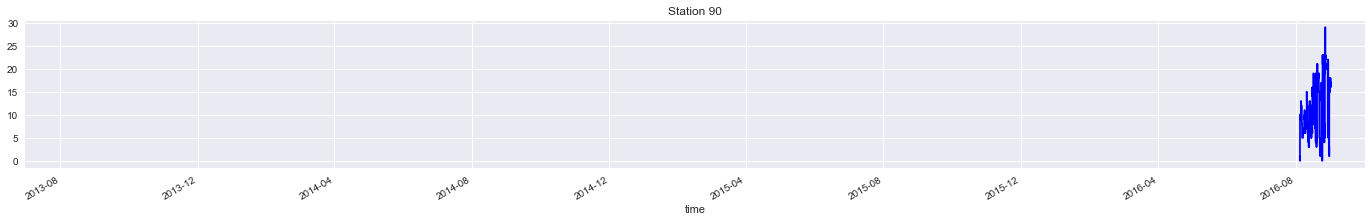

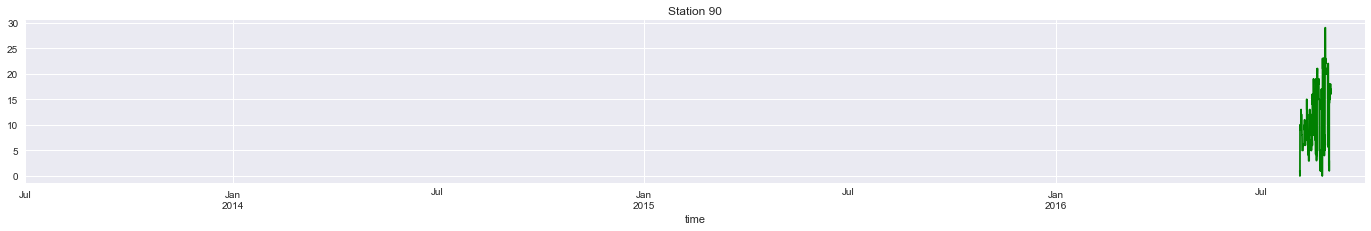

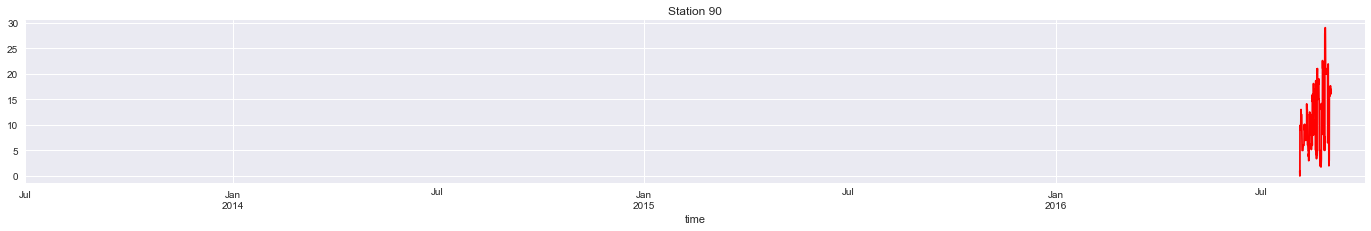

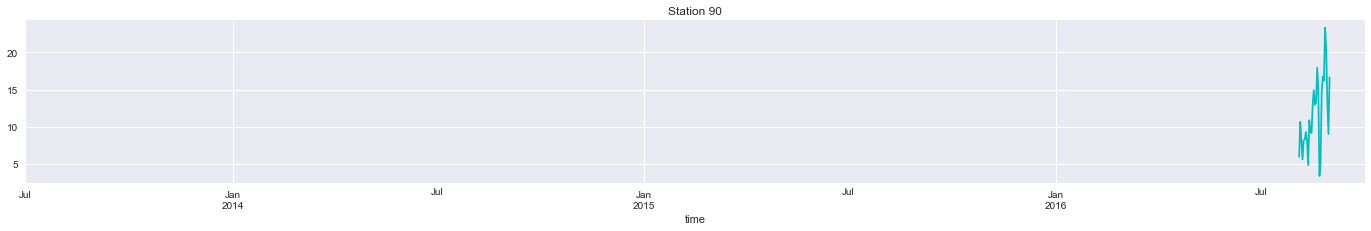

In [30]:
t_min = pd.Timestamp('2013-07-01')
t_max = pd.Timestamp('2016-10-01')

station_test_list = [2, 3, 25, 90]

for station in station_test_list:
# for station in sorted(pd.unique(status_data.station_id)):
    show_station(status_data, station, t_min, t_max, color='b') 
    show_station(status_data_5m, station, t_min, t_max, color='g') 
    show_station(status_data_1h, station, t_min, t_max, color='r') 
    show_station(status_data_1d, station, t_min, t_max, color='c') 

## Write Downsampled data sets to files

In [ ]:
print('[%s]\tWriting File...' % datetime.datetime.now().time())
status_data.to_csv('../clean_data/status_data_cleaned_1m.csv', encoding='utf-8')
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

In [ ]:
print('[%s]\tWriting File...' % datetime.datetime.now().time())
status_data_5m.to_csv('../clean_data/status_data_cleaned_5m.csv', encoding='utf-8')
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

In [ ]:
print('[%s]\tWriting File...' % datetime.datetime.now().time())
status_data_1h.to_csv('../clean_data/status_data_cleaned_1h.csv', encoding='utf-8')
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

In [ ]:
print('[%s]\tWriting File...' % datetime.datetime.now().time())
status_data_1d.to_csv('../clean_data/status_data_cleaned_1d.csv', encoding='utf-8')
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

# Merge Station Data into Status Data

## Load Station Data

In [31]:
station_data = pd.DataFrame()
station_data = pd.read_csv('../clean_data/station_data_cleaned_final.csv', parse_dates=['first_service_date', 'last_service_date'], index_col=0)

station_data_basic = pd.DataFrame()
# drop duplicated station_id ros, keep first
station_data_basic = station_data.copy()
station_data_basic.drop_duplicates(subset=['station_id'], keep='first', inplace=True)

station_data_basic.drop(['lat', 'long', 'landmark', 'zip_code'], axis=1, inplace=True)

station_data_basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 78
Data columns (total 6 columns):
station_id            74 non-null int64
name                  74 non-null object
dock_count            74 non-null int64
first_service_date    74 non-null datetime64[ns]
last_service_date     74 non-null datetime64[ns]
days_in_service       74 non-null int64
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 4.0+ KB


In [32]:
station_data_basic.head()

,station_id,name,dock_count,first_service_date,last_service_date,days_in_service
0,2,San Jose Diridon Caltrain Station,27,2013-08-29,2016-08-31,1098
1,3,San Jose Civic Center,15,2013-08-29,2016-08-31,1098
2,4,Santa Clara at Almaden,11,2013-08-29,2016-08-31,1098
3,5,Adobe on Almaden,19,2013-08-29,2016-08-31,1098
4,6,San Pedro Square,15,2013-08-29,2016-08-31,1098


In [33]:
station_data_basic.drop(['first_service_date', 'last_service_date', 'days_in_service', 'name'], axis=1, inplace=True)
station_data_basic.head()

,station_id,dock_count
0,2,27
1,3,15
2,4,11
3,5,19
4,6,15


In [34]:
# intialize merge data frames
status_merged_1m = pd.DataFrame()
status_merged_5m = pd.DataFrame()
status_merged_1h = pd.DataFrame()
status_merged_1d = pd.DataFrame()



In [35]:
# merge status data with station data,  we will have to correct the dock count for station 73 later

print('[%s] - Starting Merge 1m' % (datetime.datetime.now().time()))
status_merged_1m = pd.merge(status_data, station_data_basic, on='station_id')
print('[%s] - Merge Complete\n' % (datetime.datetime.now().time()))

print('[%s] - Starting Merge 5m' % (datetime.datetime.now().time()))
status_merged_5m = pd.merge(status_data_5m, station_data_basic, on='station_id')
print('[%s] - Merge Complete\n' % (datetime.datetime.now().time()))

print('[%s] - Starting Merge 1h' % (datetime.datetime.now().time()))
status_merged_1h = pd.merge(status_data_1h, station_data_basic, on='station_id')
print('[%s] - Merge Complete\n' % (datetime.datetime.now().time()))

print('[%s] - Starting Merge 1d' % (datetime.datetime.now().time()))
status_merged_1d = pd.merge(status_data_1d, station_data_basic, on='station_id')
print('[%s] - Merge Complete\n' % (datetime.datetime.now().time()))

[01:24:14.094259] - Starting Merge 1m
[01:25:10.270559] - Merge Complete

[01:25:10.274300] - Starting Merge 5m
[01:25:16.946787] - Merge Complete

[01:25:16.947040] - Starting Merge 1h
[01:25:17.508292] - Merge Complete

[01:25:17.508531] - Starting Merge 1d
[01:25:17.546775] - Merge Complete

[01:25:17.547381] - Cleaning Up


ValueError: labels ['level_0' 'index'] not contained in axis

In [36]:
status_merged_1m.head()

,station_id,bikes_available,docks_available,time,dock_count
0,2,2,25,2013-08-29 12:06:00,27
1,2,2,25,2013-08-29 12:07:00,27
2,2,2,25,2013-08-29 12:08:00,27
3,2,2,25,2013-08-29 12:09:00,27
4,2,2,25,2013-08-29 12:10:00,27


In [37]:
status_merged_5m.head()

,station_id,time,bikes_available,docks_available,dock_count
0,2,2013-08-29 12:05:00,2.0,25.0,27
1,2,2013-08-29 12:10:00,2.0,25.0,27
2,2,2013-08-29 12:15:00,2.0,25.0,27
3,2,2013-08-29 12:20:00,2.0,25.0,27
4,2,2013-08-29 12:25:00,2.0,25.0,27


In [38]:
status_merged_1h.head()

,station_id,time,bikes_available,docks_available,dock_count
0,2,2013-08-29 12:00:00,2.000000,25.000000,27
1,2,2013-08-29 13:00:00,2.698113,24.301887,27
2,2,2013-08-29 14:00:00,2.000000,25.000000,27
3,2,2013-08-29 15:00:00,2.000000,25.000000,27
4,2,2013-08-29 16:00:00,2.000000,25.000000,27


In [39]:
status_merged_1d.head()

,station_id,time,bikes_available,docks_available,dock_count
0,2,2013-08-29,2.241433,24.758567,27
1,2,2013-08-30,5.181677,21.818323,27
2,2,2013-08-31,12.219772,14.780228,27
3,2,2013-09-01,10.522042,16.477958,27
4,2,2013-09-02,11.238994,15.761006,27


In [ ]:
important_cols = ['dock_count']

for i in pd.unique(status_merged_1d.station_id):
    tmp = status_merged_1d[status_merged_1d.station_id == i]
    print('Station ', i)
    for item in important_cols:
        print('%s - %s' % (item, sorted(pd.unique(tmp[item]))))
    
    print('------------------------------')

In [40]:
# cleanup station 73, after 05/19/2015 the dock count is 19, up from 15

change_date = datetime.datetime.strptime('2015-05-19', '%Y-%m-%d')
dock_count_fix(status_merged_1m, 73, change_date, 19)
dock_count_fix(status_merged_5m, 73, change_date, 19)
dock_count_fix(status_merged_1h, 73, change_date, 19)
dock_count_fix(status_merged_1d, 73, change_date, 19)

# print('[%s]\tSubsetting dates...' % datetime.datetime.now().time())
# index_to_update = status_merged[(status_merged.station_id == 73) & (status_merged.time >= change_date)].index
# print('\t[%s]\tComplete!' % datetime.datetime.now().time())

# print('[%s]\tStarted Update...' % datetime.datetime.now().time())
# status_merged.loc[index_to_update, 'dock_count'] = 19
# print('\t[%s]\tComplete!' % datetime.datetime.now().time())


[01:27:44.263573]	Updating Total Station 73 Dock Count to 19 for dates after 2015-05-19 00:00:00
[01:27:44.264728]	Getting Update Index...
	[01:28:25.564254]	Complete!
[01:28:25.572109]	Started Update...
	[01:28:41.794105]	Complete!
[01:28:41.818491]	Updating Total Station 73 Dock Count to 19 for dates after 2015-05-19 00:00:00
[01:28:41.818766]	Getting Update Index...
	[01:28:44.708475]	Complete!
[01:28:44.708772]	Started Update...
	[01:28:47.808661]	Complete!
[01:28:47.810431]	Updating Total Station 73 Dock Count to 19 for dates after 2015-05-19 00:00:00
[01:28:47.810823]	Getting Update Index...
	[01:28:48.090818]	Complete!
[01:28:48.091002]	Started Update...
	[01:28:48.405346]	Complete!
[01:28:48.408015]	Updating Total Station 73 Dock Count to 19 for dates after 2015-05-19 00:00:00
[01:28:48.408382]	Getting Update Index...
	[01:28:48.444412]	Complete!
[01:28:48.444732]	Started Update...
	[01:28:48.454450]	Complete!


In [47]:
cols = ['station_id', 'dock_count']

for i in [73]:
    tmp = status_merged_1m[status_merged_1m.station_id == i]
    print('\nStation ', i)
    for item in cols:
        print('%s - %s' % (item, sorted(pd.unique(tmp[item]))))
    
    print('------------------------------')


Station  73
station_id - [73]
dock_count - [15, 19]
------------------------------


## Calculate Station Utilization at each interval

> number of docks available / number of total docks

In [49]:
print('[%s] Calculate Utilization - status_merged_1m' % datetime.datetime.now().time())
status_merged_1m['utilization'] = status_merged_1m['docks_available'] / status_merged_1m['dock_count']
status_merged_1m['utilization'] = status_merged_1m['utilization'].apply(lambda x: 1.0 if x > 1.0 else x)

print('[%s] Calculate Utilization - status_merged_5m' % datetime.datetime.now().time())
status_merged_5m['utilization'] = status_merged_5m['docks_available'] / status_merged_5m['dock_count']
status_merged_5m['utilization'] = status_merged_5m['utilization'].apply(lambda x: 1.0 if x > 1.0 else x)

print('[%s] Calculate Utilization - status_merged_1h' % datetime.datetime.now().time())
status_merged_1h['utilization'] = status_merged_1h['docks_available'] / status_merged_1h['dock_count']
status_merged_1h['utilization'] = status_merged_1h['utilization'].apply(lambda x: 1.0 if x > 1.0 else x)

print('[%s] Calculate Utilization - status_merged_1d' % datetime.datetime.now().time())
status_merged_1d['utilization'] = status_merged_1d['docks_available'] / status_merged_1d['dock_count']
status_merged_1d['utilization'] = status_merged_1d['utilization'].apply(lambda x: 1.0 if x > 1.0 else x)


print('[%s] Complete!' % datetime.datetime.now().time())

[01:32:17.321010] Calculate Utilization - status_merged_1m
[01:33:41.397052] Calculate Utilization - status_merged_5m
[01:33:51.825116] Calculate Utilization - status_merged_1h
[01:33:52.742054] Calculate Utilization - status_merged_1d
[01:33:52.788063] Complete!
[01:33:52.788350] Complete!


## Write Updated data sets to files

In [53]:
print('[%s]\tWriting File...' % datetime.datetime.now().time())
status_merged_1m.to_csv('../clean_data/status_data_cleaned_1m_util.csv', encoding='utf-8')
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

[01:38:24.261081]	Writing File...
	[01:58:08.721426]	Complete!


In [54]:
print('[%s]\tWriting File...' % datetime.datetime.now().time())
status_merged_5m.to_csv('../clean_data/status_data_cleaned_5m_util.csv', encoding='utf-8')
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

[01:58:42.798255]	Writing File...
	[02:02:29.581767]	Complete!


In [55]:
print('[%s]\tWriting File...' % datetime.datetime.now().time())
status_merged_1h.to_csv('../clean_data/status_data_cleaned_1h_util.csv', encoding='utf-8')
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

[02:02:56.543132]	Writing File...
	[02:03:17.531285]	Complete!


In [56]:
print('[%s]\tWriting File...' % datetime.datetime.now().time())
status_merged_1d.to_csv('../clean_data/status_data_cleaned_1d_util.csv', encoding='utf-8')
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

[02:03:50.249353]	Writing File...
	[02:03:52.025886]	Complete!


In [58]:
status_merged_1d.head()

,station_id,time,bikes_available,docks_available,dock_count,utilization
0,2,2013-08-29,2.241433,24.758567,27,0.916984
1,2,2013-08-30,5.181677,21.818323,27,0.808086
2,2,2013-08-31,12.219772,14.780228,27,0.547416
3,2,2013-09-01,10.522042,16.477958,27,0.610295
4,2,2013-09-02,11.238994,15.761006,27,0.583741


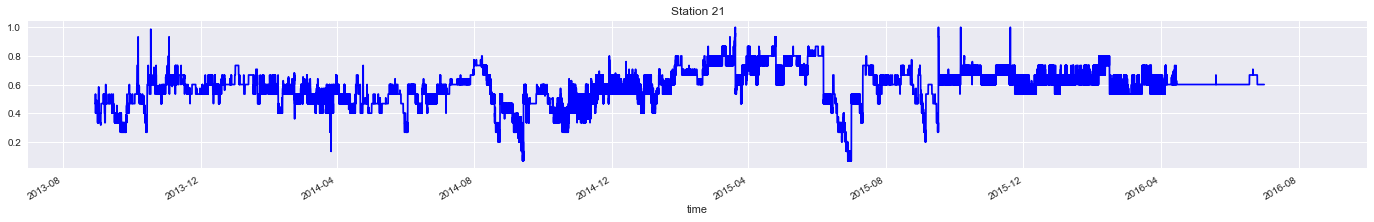

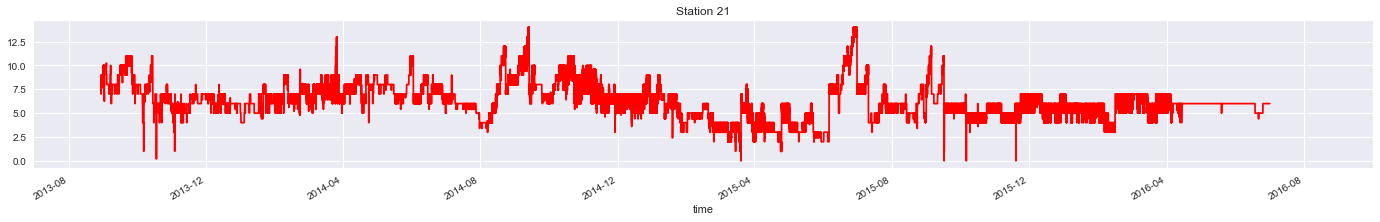

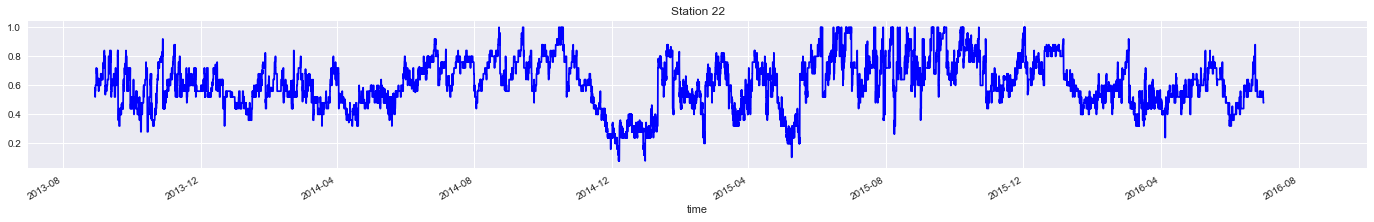

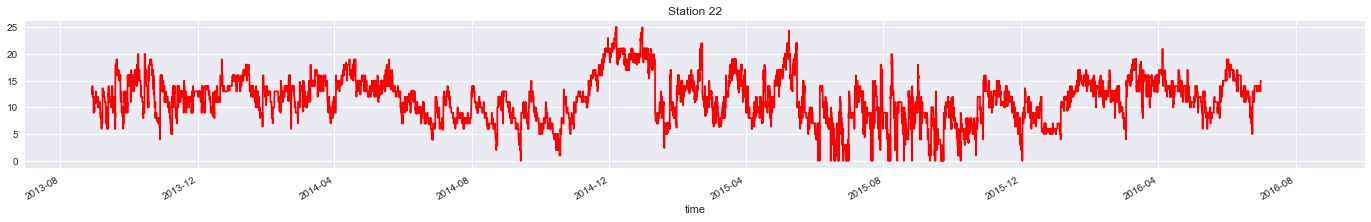

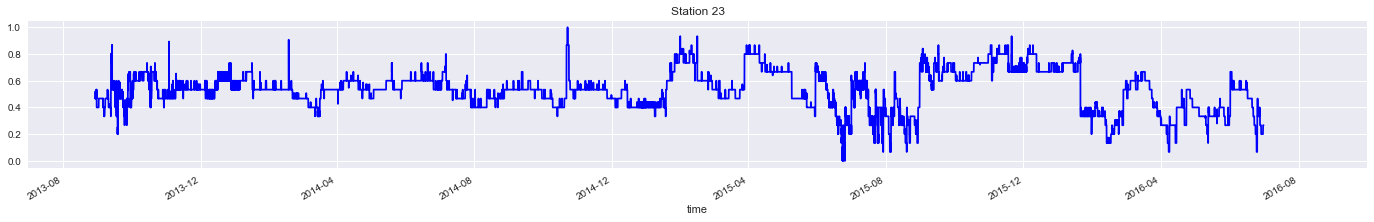

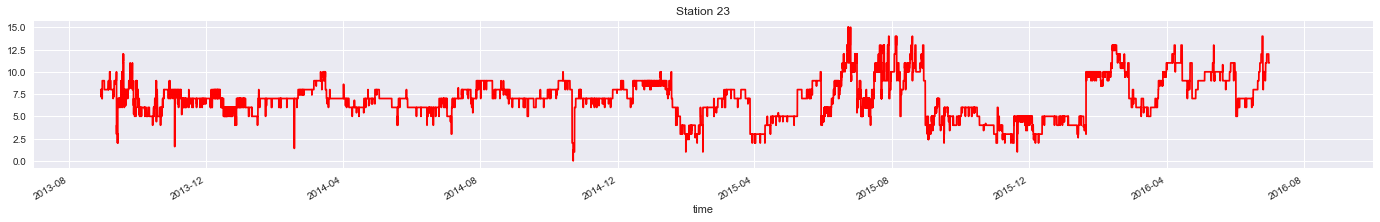

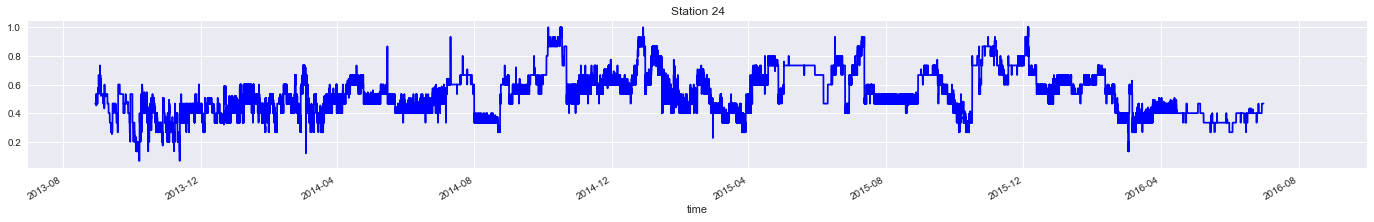

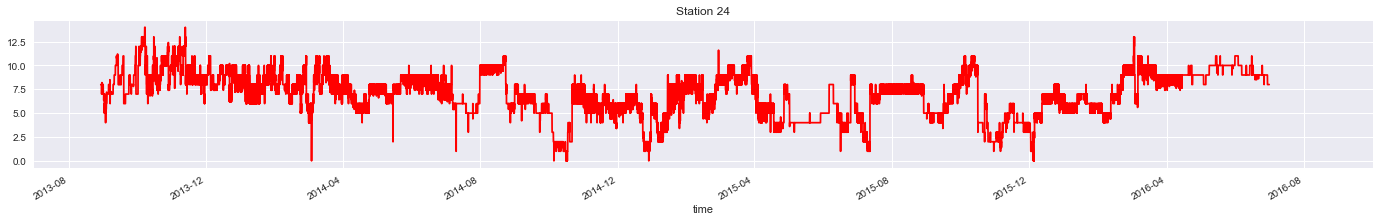

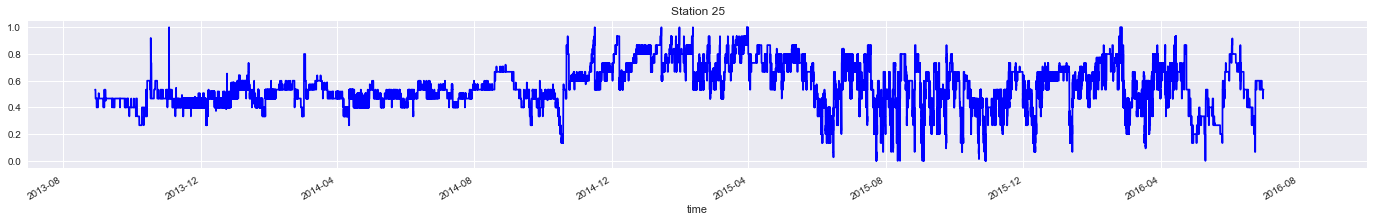

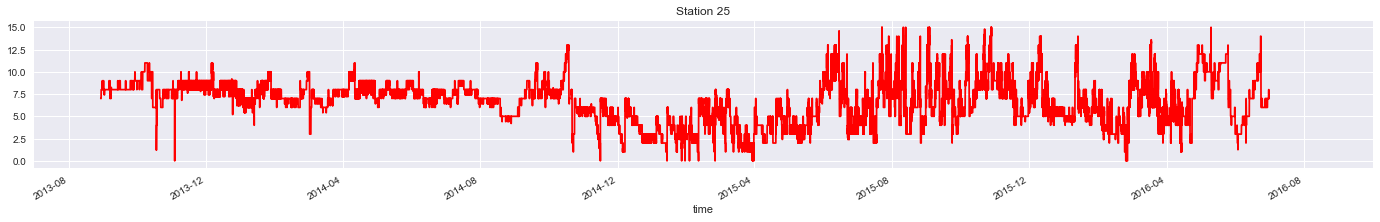

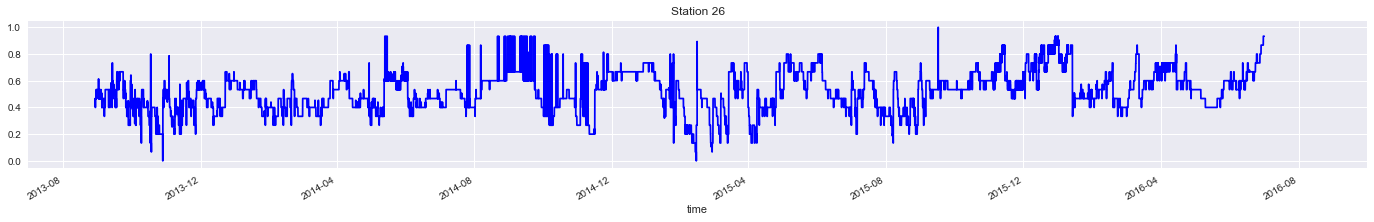

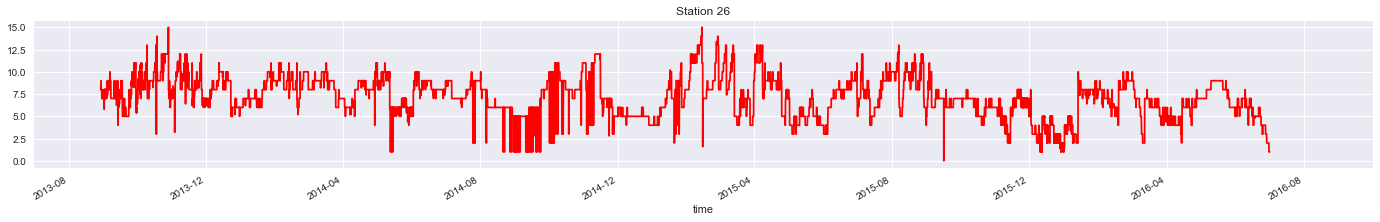

In [64]:
closed_stations = [21, 22, 23, 24, 25, 26]

t_min = pd.Timestamp('2013-07-01')
t_max = pd.Timestamp('2016-10-01')

for station in closed_stations:
    show_station(status_merged_5m, station, t_min, t_max, col='utilization')
    show_station(status_merged_5m, station, t_min, t_max, col='bikes_available', color='r')

# Load Cleaned File

In [ ]:
try:
    status_data = pd.DataFrame()
    status_data = status_merged.copy()
    print('already working, keep going')
    
except:
    print('Loading Cleaned Status Data...')

    status_data = pd.DataFrame()
    file = '../clean_data/status_data_cleaned.csv'

    try:

        chunks = []
        chunk_counter = 1
        chunksize = 10000
        num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)

        # import file in chunks
        for chunk in pd.read_csv(file, chunksize=chunksize, iterator=True, parse_dates=['time'], index_col=0):

            # append chunk to chunks list
            chunks.append(chunk)

            if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
                print('\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
            chunk_counter += 1

        print('Concatenating Chunks')
        status_data = pd.DataFrame()
        status_data = pd.concat(chunks)
        print('Data Loaded Successfully!')
    
    except:
        print('oops... something went wrong importing the data :(')

In [ ]:
status_data.sort_values(['station_id', 'time'], inplace=True)
status_data.head(10)

### Analysis

In [ ]:
status_data.info()

In [ ]:
status_data.head()

In [ ]:
status_data.set_index('time', inplace=True)

In [ ]:
for i in sorted(pd.unique(status_data.station_id)):
    tmp = status_data[status_data.station_id == i]
#     ax = tmp.utilization.resample('M').mean().plot(figsize=(12,3))
    ax = tmp.utilization.resample('M').mean().fillna(0).rolling(window=3, min_periods=1).mean().plot(figsize=(12,3))
    t = 'Station %s' %i
    ax.set_title(t)
    ax.set_ylim(0,1)
    plt.show()
    


In [ ]:
s91 = status_data[status_data.station_id == 91]

In [ ]:
s91.info()

In [ ]:
s91.head()

In [ ]:
closed_stations = [21, 22, 23, 24, 25, 26]
closed_stations = [73]

redwood_city_station_utilization = pd.DataFrame()
chunks = []

# for i in closed_stations:
for i in sorted(pd.unique(status_data.station_id)):
    ax = status_data[status_data.station_id == i]['dock_count'].plot(figsize=(12,2))
    t = 'Station %s' % i
    ax.set_title(t)
    plt.show()
    

In [ ]:
top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]
temp = status_data[status_data.station_id.isin(top_am_commute_start_terms)]

In [ ]:
plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=temp.index.dayofweek, y="utilization", hue="station_id", data=temp)

ax.set(xlabel='Day of Week')
# plt.legend()
plt.show()



In [ ]:
for i in top_am_commute_start_terms:
    temp = status_data[status_data.station_id == i]

    plt.subplots(figsize=(15,5))
    ax = sns.boxplot(x=temp.index.hour, y="utilization", data=temp)
    ax.set(xlabel='Hour of Day')
    ax.set(title='Station %s' % i)
    # plt.legend()
    plt.show()




In [ ]:

top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]
temp = status_data[status_data.station_id.isin(top_am_commute_start_terms)]
plt.subplots(figsize=(15,5))
ax = sns.pointplot(x=temp.index.hour, y="utilization", hue='station_id', data=temp)
ax.set(xlabel='Hour of Day')
ax.set(title='Station %s' % i)
plt.legend()
plt.show()

In [ ]:
top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]
temp = status_data[status_data.station_id.isin(top_am_commute_start_terms)]

sns.jointplot(x=temp.index.hour, y="utilization", data=temp)

In [ ]:

top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]
temp = status_data[status_data.station_id.isin(top_am_commute_start_terms)]
plt.subplots(figsize=(15,5))
ax = sns.jointplot(x=temp.index.hour, y="utilization", data=temp, kind='reg')
ax.set(xlabel='Hour of Day')
ax.set(title='Station %s' % i)
plt.legend()
plt.show()

In [ ]:
status_data.groupby(['station_id', status_data.index.day, status_data.index.hour])['utilization'].mean().plot(figsize=(12,6), alpha=0.2)
plt.show()

In [ ]:
test = status_data[status_data.station_id == 73]
ax = test.groupby([test.index.hour, test.index.minute])['bikes_available'].median().plot(kind='bar', figsize=(12,6))
test.groupby([test.index.hour, test.index.minute])['bikes_available'].mean().plot(kind='line', color='g', ax=ax)
# test.groupby([test.index.hour, test.index.minute])['dock_count'].max().plot(kind='line', color='r', ax=ax)
plt.show()

In [ ]:
top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]

In [ ]:
counter = 0

for station in [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]:
    test = status_data[status_data.station_id == station]
    
    if counter == 0:
#         ax = test.groupby([test.index.dayofweek, test.index.hour, test.index.minute])['utilization'].mean().plot(kind='line', figsize=(12,6))
        ax = test.groupby([test.index.dayofweek, test.index.hour])['utilization'].mean().plot(kind='line', figsize=(12,6))
        counter += 1
    else:
#         test.groupby([test.index.dayofweek, test.index.hour, test.index.minute])['utilization'].mean().plot(kind='line', ax=ax)
        test.groupby([test.index.dayofweek, test.index.hour])['utilization'].mean().plot(kind='line', ax=ax)

plt.show()